<a href="https://colab.research.google.com/github/navas604/Statistical-Learning-II/blob/main/Practica%204%20-%20Forward%20Propagation%20Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **15/08/2021**

---

## **PRÁCTICA 4 - FORWARD PROPAGATION Y ANÁLISIS DE REPRESENTACIONES INTERMEDIAS**

---

### CARGAR LIBRERIAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### FORWARD-PROPAGATION (INFERENCIA, PREDICCIÓN O ESTIMACIÓN)


Igorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [3]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [4]:
Wc2 = np.array([0.3,0.5,0.9])

In [5]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

In [6]:
H = np.matmul(X,Wc1)

In [7]:
X.shape

(4, 3)

In [8]:
Wc1.shape

(3, 3)

In [9]:
H.shape

(4, 3)

In [10]:
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [11]:
A = sigmoid(H)

In [12]:
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [13]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [14]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

In [15]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [16]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [17]:
y_aprox = f(g(X))

In [18]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

### ORIENTADO A OBJETOS

#### EJERCICIO 1


<img src="https://i.imgur.com/IDFRq5a.png">

[0.73105858 0.78583498 0.68997448]

In [19]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [0.8, 0.4, 0.3],
                         [0.2, 0.9, 0.5]
    ])

    self.Wc2 = np.array([0.3, 0.5, 0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return A, y_aprox

In [20]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [21]:
red = RedNeuronal()
HL, result = red.forward_propagation(X)

print('Capa intermedia: \n', HL, '\n')
print('Capa intermedia con mayor presencia: \n', np.max(HL[:,:2], axis=1), '\n')
print('Resultado "y" aproximado: \n', result)

Capa intermedia: 
 [[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]] 

Capa intermedia con mayor presencia: 
 [0.78583498 0.90024951 0.99776215 0.99983344] 

Resultado "y" aproximado: 
 [0.77438027 0.80026216 0.84194007 0.84485948]


#### EJERCICIO 2

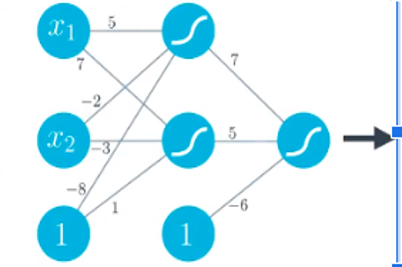

In [22]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [5, 7],
                         [-2, -3],
                         [-8, 1]
    ])

    self.Wc2 = np.array([7, 5, -6])

  def forward_propagation(self,X):
    X = np.c_[X, np.ones(X.shape[0])]
    A = sigmoid(np.matmul(X,self.Wc1))
    A = np.c_[A, np.ones(A.shape[0])]

    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return A, y_aprox

In [23]:
# 4 observaciones, 2 variables
X = np.array([
      [1, 1],
      [1, 2],
      [4, 5],
      [6, 7],
])

In [24]:
red = RedNeuronal()
HL, result = red.forward_propagation(X)

print('Capa intermedia: \n', HL, '\n')
print('Capa intermedia con mayor presencia: \n', np.max(HL[:,:2], axis=1), '\n')
print('Resultado "y" aproximado: \n', result)

Capa intermedia: 
 [[6.69285092e-03 9.93307149e-01 1.00000000e+00]
 [9.11051194e-04 8.80797078e-01 1.00000000e+00]
 [8.80797078e-01 9.99999168e-01 1.00000000e+00]
 [9.99664650e-01 1.00000000e+00 1.00000000e+00]] 

Capa intermedia con mayor presencia: 
 [0.99330715 0.88079708 0.99999917 1.        ] 

Resultado "y" aproximado: 
 [0.27158134 0.16943494 0.99432264 0.99752158]


#### EJERCICIO 3

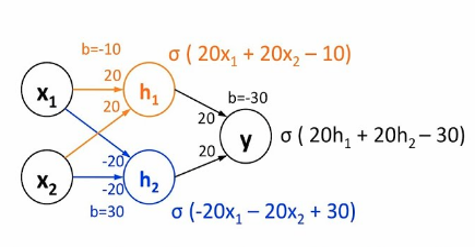

In [25]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [20, -20],
                         [20, -20]
    ])

    self.B1 = np.array([-10, 30])

    self.Wc2 = np.array([20, 20])

    self.B2 = np.array([-30])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1) + self.B1)
    y_aprox = sigmoid(np.matmul(A,self.Wc2) + self.B2)

    return A, y_aprox

In [26]:
# 4 observaciones, 2 variables
X = np.array([
      [1, 1],
      [1, 0],
      [0, 1],
      [0, 0],
])

In [27]:
red = RedNeuronal()
HL, result = red.forward_propagation(X)

print('Capa intermedia: \n', HL, '\n')
print('Capa intermedia con mayor presencia: \n', np.max(HL[:,:2], axis=1), '\n')
print('Resultado "y" aproximado: \n', result)

Capa intermedia: 
 [[1.00000000e+00 4.53978687e-05]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [4.53978687e-05 1.00000000e+00]] 

Capa intermedia con mayor presencia: 
 [1.        0.9999546 0.9999546 1.       ] 

Resultado "y" aproximado: 
 [4.54391049e-05 9.99954520e-01 9.99954520e-01 4.54391049e-05]


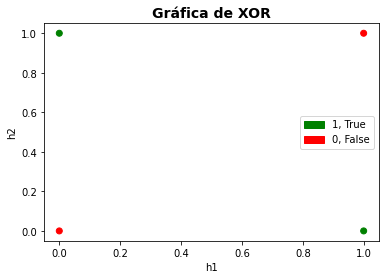

In [28]:
# Gráfica de capa de entrada

colors = np.where(np.prod(HL, axis=1) > 0.5, 'g', 'r')
true = mpatches.Patch(color='g', label='1, True')
false = mpatches.Patch(color='r', label='0, False')

plt.scatter(X[:,0], X[:,1], color=colors)
plt.title("Gráfica de XOR", fontdict={"fontsize":14, "color":"black", "fontweight":"bold"})
plt.xlabel('h1')
plt.ylabel('h2')
plt.legend(handles=[true, false])
plt.show()

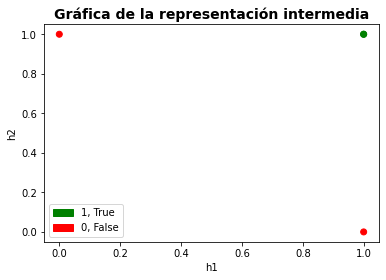

In [29]:
# Gráfica de capa intermedia

colors = np.where(np.prod(HL, axis=1) > 0.5, 'g', 'r')
true = mpatches.Patch(color='g', label='1, True')
false = mpatches.Patch(color='r', label='0, False')

plt.scatter(HL[:,0], HL[:,1], color=colors)
plt.title("Gráfica de la representación intermedia", fontdict={"fontsize":14, "color":"black", "fontweight":"bold"})
plt.xlabel('h1')
plt.ylabel('h2')
plt.legend(handles=[true, false])
plt.show()

**CONCLUSIONES**

En este último ejercicio, al analizar las dos gráficas presentadas, se puede determinar que en la primera ("Gráfica de XOR") no existe forma de separar linealmente el resultado de aplicar XOR a las entradas, pero al analizar la capa intermedia ("Gráfica de la representación intermedia") se puede observar que sí son linealmente separable.

### IDENTIFICACIÓN DE NUMERO DE PARÁMETROS

#### EJERCICIO 1

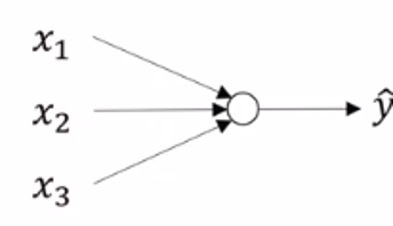

Asumiendo que no tiene BIAS, tiene 3 parámetros.

#### EJERCICIO 2

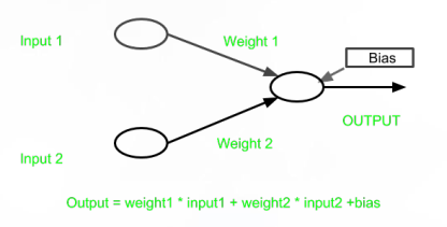

Tiene 3 parámetros.

#### EJERCICIO 3

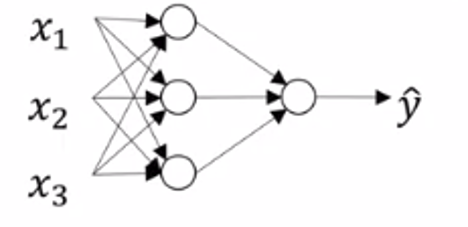

Asumiendo que no tiene BIAS, tiene 12 parámetros.

#### EJERCICIO 4

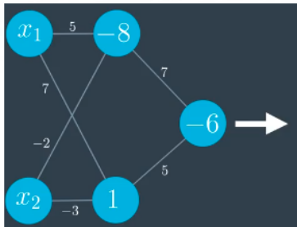

Asumiendo que los valores que se ven (-8, 1, -6) en las neuronas de la capa oculta y la neurona de salida son el BIAS, entonces la red neuronal tiene 9 parámetros.

#### EJERCICIO 5

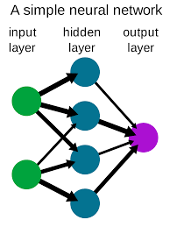

Asumiendo que no tiene BIAS, y que las neuronas de la capa de entrada están conectadas a las 4 neuronas de la capa intermedia (hace falta una conexión de cada neurona de entrada en la imagen), entonces la red neuronal tiene 12 parámetros.

#### EJERCICIO 6

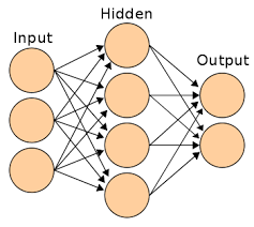

Asumiendo que no tiene BIAS, tiene 20 parámetros.